# Final Project Submission

Please fill out:
* Student name: James Benedito 
* Student pace: Part Time
* Scheduled project review date/time: 
* Instructor name: Morgan Jones


# Introduction

When it comes to the entertainment industry, movies are a pervasive form of content that people pay to see. From going to the theater to see movies with friends to streaming movies at home using various services, people around the world watch films to escape from the stresses of everyday life. Making films is an art that requires the consideration of numerous variables. Making movies that are received well by audiences and lead to high earnings at the box office is the goal of every film producer. This Jupyter notebook will analyze different variables that impact the outcomes of how successful a movie is; it will be useful for new studios that are starting out and want to break into the film industry.

# Business Problem

Microsoft is a technology-based company that was founded in 1975 by Bill Gates and Paul Allen. Currently, Microsoft is a global company, possessing numerous offices worldwide and being the producer of many well-known products, applications, and services, such as Microsoft Office. According to their website, Microsoft values innovation and has a mission "to empower every person and every organization on the planet to achieve more" (https://www.microsoft.com/en-us/about).

Microsoft wants to launch a new movie studio. However, while they are a company that is well-versed in technology, they don't have experience creating films. Therefore, they need guidance on the type of content they should create.

# Variables to Consider

As far as variables go, I will look at movies with the <b>highest ratings</b> and <b>highest worldwide gross</b>. Ratings are a direct indicator of audience perception---it's a numeric way for people to communicate how they felt about a film overall. Because viewers are the ones going to the theaters to watch films, their opinions should be factored in when considering the types of movies to make. Microsoft wants to create movies that people want to go see. 

Worlwide gross should also be considered because it has an impact on financial stakeholders, such as producers and other people who invested money into a film's creation. Box office earnings also show how the public felt about a movie because they show whether or not a significant portion of the global population was paying to watch a certain film. 

# Goal

My goal is to use the movies with the <b>highest ratings</b> and <b>highest worldwide gross</b> to inform my suggestions on <b>genres</b> Microsoft should focus on, the <b>runtime</b> length their films should target, and an <b>optimal budget range</b> for their productions that they should shoot for.

# Datasets 

To help Microsoft decide which direction to go in, I will analyze the following datasets:
- <b>im.db</b>
- <b>tn.movie_budgets.csv</b>

The im.db dataset houses data from IMDB, a website that posts information on different movies, such as genre and runtime. Meanwhile, the tn.movie_budgets.csv holds data from a website called the Box Office, which houses financial information surrounding various films, like production budget and gross. The information presented in these datasets are relevant to the variables I want to consider and will help me achieve my goal.

My plan is to use the <b>im.db</b> dataset to compare <b>genre</b> and <b>runtime</b> against <b>ratings</b> and the <b>tn.movie_budgets.csv</b> to compare <b>production budget</b> against <b>worldwide gross</b>.

# Data and Results

In [1]:
# importing relevant packages
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Genre

As stated earlier, to decide on the <b>genres</b> Microsoft should focus on when creating their films, I will analyze the <b>im.db</b> dataset. In particular, I will look at information presented in the <b>movie_basics</b> and <b>movie_ratings</b> tables.

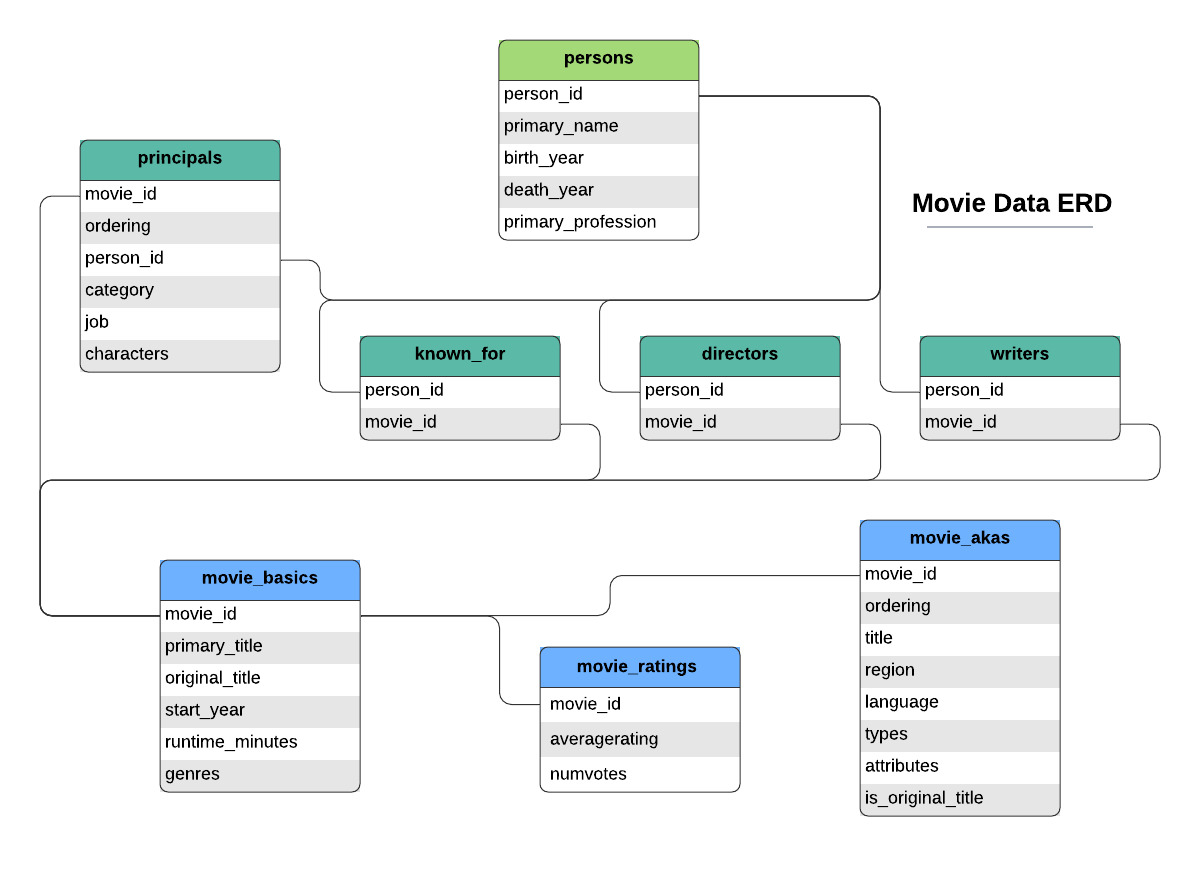

In [2]:
# connecting to sqlite3 to open im.db
conn = sqlite3.connect('zippedData\\im.db')

For the <b>movie_basics</b> table, I will use the <b>.head()</b> and <b>.info()</b> methods to do an initial exploration of its content.

In [3]:
# exploring column content in movie_basics table
q = """
SELECT *
FROM movie_basics
"""
movie_basics_df = pd.read_sql(q, conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [4]:
#exploring general info about the movie_basics table
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


The <b>movie_basics</b> table has six columns. Original_title, runtime_minutes, and genres are missing values.

Let's repeat the exploration process with the <b>movie_ratings</b> table.

In [5]:
# exploring column content in movie_ratings table
q = """
SELECT *
FROM movie_ratings
"""
movie_ratings_df = pd.read_sql(q, conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
# exploring general info about the movie_ratings table
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


The <b>movie_ratings</b> table has three columns and has no missing values according to the .info() method.

In [7]:
# looking at min and max number of votes
print(movie_ratings_df['numvotes'].min())
print(movie_ratings_df['numvotes'].max())

5
1841066


Genres will be organized by highest average rating and be presented in descending order. To further filter the data, the number of votes should also be considered because a movie with only 5 votes may tend to have higher ratings due to a smaller sample size. Thus, I will make it so the joined table only includes films with more than 100,000 votes.

In [8]:
# Creating joined table that includes genres, average rating, and number of votes
# Filter data so that only movies with more than 100,000 votes appears in the table
# Table data is ordered from highest to lowest average rating
q = """
SELECT genres AS Genres, averagerating AS Average_Rating, numvotes AS Number_of_Votes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE Number_of_Votes > 100000
ORDER BY Average_Rating DESC
"""
rating_by_genre = pd.read_sql(q, conn)
rating_by_genre

,Genres,Average_Rating,Number_of_Votes
0,"Action,Drama,War",9.3,100568
1,"Action,Adventure,Sci-Fi",8.8,441135
2,"Action,Adventure,Sci-Fi",8.8,1841066
3,"Adventure,Drama,Sci-Fi",8.6,1299334
4,"Biography,Comedy,Drama",8.5,677343
...,...,...,...
613,"Action,Adventure,Drama",4.8,181687
614,"Action,Fantasy,Thriller",4.3,103608
615,"Action,Adventure,Drama",4.3,140148
616,"Drama,Romance,Thriller",4.1,279126


A Top 10 list can be generated from the previous table by adding a LIMIT filter to the code.

In [9]:
# Top 10 movies with the highest average rating and their genres
# Filtered by number of votes (greater than 100,000)
q = """
SELECT genres AS Genres, averagerating AS Average_Rating, numvotes AS Number_of_Votes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE Number_of_Votes > 100000
ORDER BY Average_Rating DESC
LIMIT 10
"""
rating_by_genre_top10 = pd.read_sql(q, conn)
rating_by_genre_top10

,Genres,Average_Rating,Number_of_Votes
0,"Action,Drama,War",9.3,100568
1,"Action,Adventure,Sci-Fi",8.8,441135
2,"Action,Adventure,Sci-Fi",8.8,1841066
3,"Adventure,Drama,Sci-Fi",8.6,1299334
4,"Biography,Comedy,Drama",8.5,677343
5,"Drama,Music",8.5,616916
6,"Action,Adventure,Animation",8.5,210869
7,"Action,Biography,Drama",8.5,123638
8,"Action,Adventure,Sci-Fi",8.5,670926
9,"Action,Thriller",8.4,1387769


Because the genres in the Top 10 table are listed as one string under the Genres column, they need to be split apart into their own separate columns so that each genre's frequency can be counted and graphed.

In [10]:
# Splitting apart genres for Top 10 rated movies and creating new table
genres_split_top10 = rating_by_genre_top10['Genres'].str.split(pat = ',', expand=True)
genres_split_top10

,0,1,2
0,Action,Drama,War
1,Action,Adventure,Sci-Fi
2,Action,Adventure,Sci-Fi
3,Adventure,Drama,Sci-Fi
4,Biography,Comedy,Drama
5,Drama,Music,None
6,Action,Adventure,Animation
7,Action,Biography,Drama
8,Action,Adventure,Sci-Fi
9,Action,Thriller,None


The <b>genres_split_top10</b> table that was generated has 0, 1, and 2 for the column names. Let's rename these columns.

In [11]:
# Renaming columns in genres_split_top10 table
genres_split_top10_renamed = genres_split_top10.set_axis(['Genre 1', 'Genre 2', 'Genre 3'], axis=1, inplace=False)
genres_split_top10_renamed

,Genre 1,Genre 2,Genre 3
0,Action,Drama,War
1,Action,Adventure,Sci-Fi
2,Action,Adventure,Sci-Fi
3,Adventure,Drama,Sci-Fi
4,Biography,Comedy,Drama
5,Drama,Music,None
6,Action,Adventure,Animation
7,Action,Biography,Drama
8,Action,Adventure,Sci-Fi
9,Action,Thriller,None


Using the <b>.value_counts()</b> method for each genre column, the frequency of each genre will be counted per column. The <b>.add()</b> method can then be used to sum up the genre count for each table column.

In [12]:
# Counting the appearance of each genre in Top 10-rated movies
Genre_1 = genres_split_top10_renamed['Genre 1'].value_counts()
Genre_2 = genres_split_top10_renamed['Genre 2'].value_counts()
Genre_3 = genres_split_top10_renamed['Genre 3'].value_counts()
Genre_1_2_added = Genre_1.add(Genre_2, fill_value=0) # fill_value takes care of null values
added_genres = Genre_3.add(Genre_1_2_added, fill_value=0)
added_genres

Action       7.0
Adventure    5.0
Animation    1.0
Biography    2.0
Comedy       1.0
Drama        5.0
Music        1.0
Sci-Fi       4.0
Thriller     1.0
War          1.0
dtype: float64

Great! Now let's make a bar chart for added_genres.

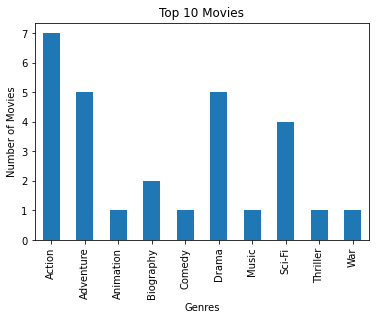

In [13]:
# Creating bar chart for number of occurrences of each genre in Top 10
added_genres.plot.bar()
plt.title('Top 10 Movies')
plt.xlabel('Genres')
plt.ylabel('Number of Movies');

The bar graph above shows the frequency of each genre in the Top 10 list. Remember, this Top 10 was created from average ratings.

# 2. Runtime

When it comes to runtime, I will continue to analyze the im.db dataset.

I want to create a table that zeroes in on the runtime_minutes column. This table will be ordered based on highest average ratings and be organized in descending order. Similar to the genre analysis done previously, I will add a filter so that only films with more than 100,000 votes appears in the joined table.

In [14]:
# Creating joined table that includes runtime_minutes, average rating, and number of votes
# Filter data so that only movies with more than 100,000 votes appears in the table
# Table data is ordered from highest to lowest average rating
q = """
SELECT runtime_minutes, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes > 100000
ORDER BY averagerating DESC
"""
averagerating_runtime = pd.read_sql(q, conn)
averagerating_runtime

,runtime_minutes,averagerating,numvotes
0,135.0,9.3,100568
1,148.0,8.8,1841066
2,181.0,8.8,441135
3,169.0,8.6,1299334
4,112.0,8.5,677343
...,...,...,...
613,100.0,4.8,181687
614,96.0,4.3,103608
615,100.0,4.3,140148
616,103.0,4.1,137734


Let's use the .corr() method to see if there's a correlation between runtime and ratings. Then, we'll graph the relationship of these two variables in a scatterplot.

In [15]:
# Using .corr method to see if there's a correlation between runtime_minutes and averagerating
averagerating_runtime.corr(method='pearson')

,runtime_minutes,averagerating,numvotes
runtime_minutes,1.000000,0.325639,0.368208
averagerating,0.325639,1.000000,0.480384
numvotes,0.368208,0.480384,1.000000


The Pearson correlation coefficient shows a weak, positive correlation between runtime and average rating (r=0.33).

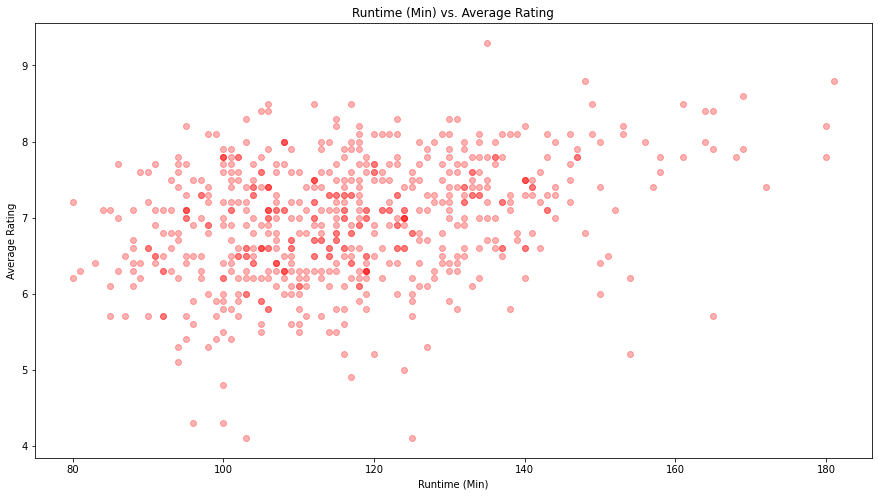

In [16]:
# Creating scatterplot for runtime_minutes vs. averagerating to visualize relationship
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(averagerating_runtime["runtime_minutes"], averagerating_runtime["averagerating"], alpha=0.3, color="red")
ax.set_title("Runtime (Min) vs. Average Rating")
ax.set_xlabel("Runtime (Min)")
ax.set_ylabel("Average Rating");

From the scatterplot, it's difficult to determine what an optimal runtime would be. Let's look at the runtimes of the Top 10-rated movies and Bottom 10-rated movies and compare them.

In [17]:
# Top 10 movies with highest average ratings and their runtimes
q = """
SELECT runtime_minutes, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes > 100000
ORDER BY averagerating DESC
LIMIT 10
"""
averagerating_runtime_top10 = pd.read_sql(q, conn)
averagerating_runtime_top10

,runtime_minutes,averagerating,numvotes
0,135.0,9.3,100568
1,148.0,8.8,1841066
2,181.0,8.8,441135
3,169.0,8.6,1299334
4,112.0,8.5,677343
5,106.0,8.5,616916
6,149.0,8.5,670926
7,117.0,8.5,210869
8,161.0,8.5,123638
9,164.0,8.4,1387769


In [18]:
# Bottom 10 movies with lowest average ratings and their runtimes
q = """
SELECT runtime_minutes, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE runtime_minutes IS NOT NULL AND numvotes > 100000
ORDER BY averagerating ASC
LIMIT 10
"""
averagerating_runtime_bottom10 = pd.read_sql(q, conn)
averagerating_runtime_bottom10

,runtime_minutes,averagerating,numvotes
0,103.0,4.1,137734
1,125.0,4.1,279126
2,96.0,4.3,103608
3,100.0,4.3,140148
4,100.0,4.8,181687
5,117.0,4.9,208387
6,124.0,5.0,211733
7,94.0,5.1,100520
8,116.0,5.2,186788
9,120.0,5.2,155344


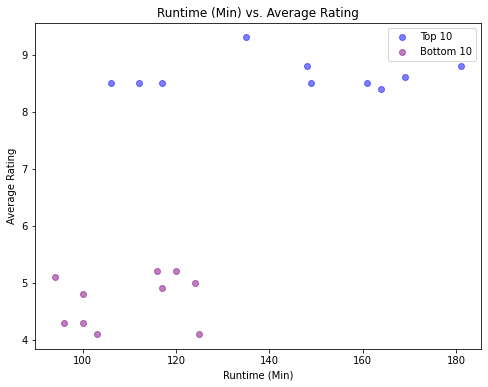

In [19]:
# Creating runtime vs. average rating scatterplot for Top 10 and Bottom 10-rated movies

fig, ax = plt.subplots(figsize=(8,6))

ax.scatter(averagerating_runtime_top10["runtime_minutes"], averagerating_runtime_top10["averagerating"], 
           alpha=0.5, color="blue", label='Top 10')
ax.scatter(averagerating_runtime_bottom10["runtime_minutes"], averagerating_runtime_bottom10["averagerating"], 
           alpha=0.5, color="purple", label='Bottom 10')
ax.set_title("Runtime (Min) vs. Average Rating")
ax.set_xlabel("Runtime (Min)")
ax.set_ylabel("Average Rating")
ax.legend();

In [20]:
# Finding mean runtime for Top 10 and Bottom 10-rated movies for comparison
print('Mean for Top 10-rated movies: ', averagerating_runtime_top10['runtime_minutes'].mean())
print('Mean for Bottom 10-rated movies: ', averagerating_runtime_bottom10['runtime_minutes'].mean())

Mean for Top 10-rated movies:  144.2
Mean for Bottom 10-rated movies:  109.5


From the scatterplot featuring the runtimes of only the Top 10 and Bottom 10-rated movies, it'll be easier to decide on a suggeston for an optimal runtime. I also looked at the mean runtimes for the Top 10 and Bottom 10 movies.

# 3. Budget

To decide on an optimal budget range, the tn.movie_budgets.csv dataset will be explored. Similar to the im.db dataset, I will use the <b>.head()</b> and <b>.info()</b> methods to look at the contents of the file.

In [21]:
# exploring column content of movie_budgets csv file
movie_budgets = pd.read_csv('zippedData\\tn.movie_budgets.csv.gz')
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
# exploring general info about the movie_budgets csv file
movie_budgets.info()
#production_budget, domestic_gross, worldwide_gross are dtype obj because they have $ and commas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Using the <b>.info()</b> method, we see that there are 6 columns and no missing values. We should also note that production_budget and worldwide_gross have an object dtype. From the <b>.head()</b> results, we see that this is because the numbers have dollar sign ($) symbols and commas. We want to convert both of these variables into int dtypes so that correlation analysis can be performed.

In [23]:
# convert production_budget to int by getting rid of $ and commas
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype('int64')

In [24]:
# convert worldwide_gross to int by getting rid of $ and commas
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype('int64')

In [25]:
# checking to see that production_budget and worldwide_gross were converted to int dtype
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 271.2+ KB


Now that production_budget and worldwide_gross have been successfully converted into int64 dtypes, correlation analysis can be done. I will also create a scatterplot of the data so that the relationship between production_budget and worldwide_gross is easier to visualize.

In [26]:
movie_budgets.corr(method='pearson')

,id,production_budget,worldwide_gross
id,1.000000,-0.035278,-0.009422
production_budget,-0.035278,1.000000,0.748306
worldwide_gross,-0.009422,0.748306,1.000000


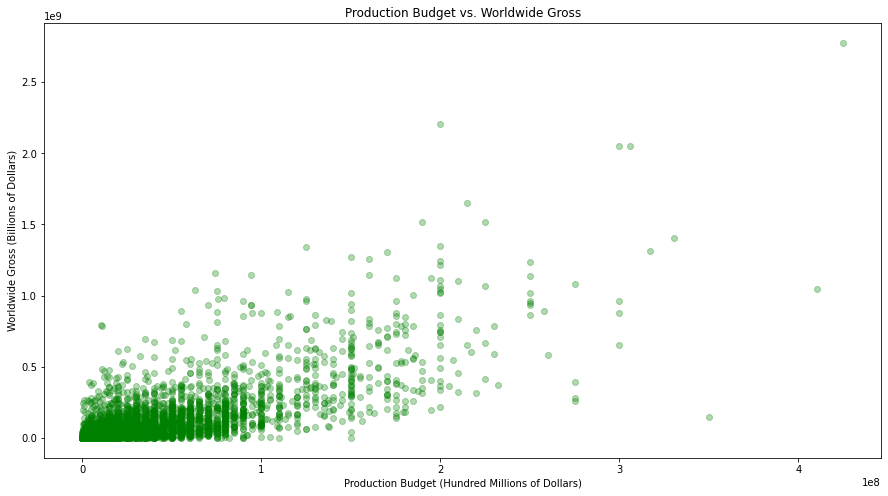

In [27]:
# Creating scatterplot for production_budget vs. worldwide_gross to visualize relationship
fig, ax = plt.subplots(figsize=(15,8))

ax.scatter(movie_budgets["production_budget"], movie_budgets["worldwide_gross"], alpha=0.3, color="green")
ax.set_title("Production Budget vs. Worldwide Gross")
ax.set_xlabel("Production Budget (Hundred Millions of Dollars)")
ax.set_ylabel("Worldwide Gross (Billions of Dollars)");

The scatterplot above can be used to determine an optimal budget range that will lead to a good worldwide gross outcome.

# Discussion

In terms of <b>genre</b>, the histogram illustrating the Top 10-rated movies showed that the most common genre yielding the highest ratings was action, which appeared 7 times. Adventure and drama had the second-highest frequency, both of them appearing 5 times. The Top 10 table also showed that the highest-rated movies were all multi-genred, being categorized under two or more genres.

When it comes to <b>optimal film length</b>, a low, positive correlation was shown between runtime and average ratings (r=0.33). However, the scatterplot displaying the runtimes of the Top 10 and Bottom 10-rated films showed that seven of the Top 10 movies had runtimes greater than 130 minutes, while all ten movies of the Bottom 10 films had runtimes less than 130 minutes. Furthermore, seven of the Bottom 10-rated movies had runtimes that were less than 120 minutes. The mean runtime of the Top 10-rated films was 144 minutes and the Bottom 10 movies had a lower mean runtime of 110 minutes. This shows that lower-rated movies were generally shorter in their runtime.

For <b>production budget</b>, there was a relatively high, positive correlation with worldwide gross (r=0.75). This shows that investing more in a particular movie tends to lead to a better outcome at the global box office. Most of the films represented in the scatterplot do not exceed 100 million dollars in production budget, as indicated by the high concentration of green dots at the left-most area of the graph, but the majority of these same movies also had worldwide gross earnings below 1 billion dollars. Most of the films that exceeded 1 billion dollars in worldwide gross had production budgets above 100 million dollars. Furthermore, the movies with the highest worldwide gross had production budgets that were greater than 200 million dollars. 

# Conclusions

For <b>genre</b>, I would recommend that Microsoft starts by creating films that mix and match <b>action, adventure</b>, and <b>drama</b>. These genres were the most common in the Top 10 movies and show good outcomes in terms of ratings. In addition, the Top 10-rated movies were all multi-genred, so doing various combinations of action, adventure, and drama would likely make a movie that people are compelled to see. 

For the <b>runtime</b>, I suggest that Microsoft makes films that are <b>at least 130 minutes long</b>. Most of the movies in the Bottom 10-rated films were less than two hours. The lower ratings may be because movies that are under two hours don't have as much time to fully develop characters and other plot elements. Furthermore, the data shows that most of the films in the Top 10 were above 130 minutes in film length.

For <b>production budget</b>, I recommend that Microsoft invests <b>at least 100 million dollars</b> in the movies they make. The data shows that most of the movies that had budgets below 100 million dollars made less than 1 billion dollars in worldwide gross. If Microsoft wants to exceed the 1 billion dollar threshold in box office earnings, having a production budget of at least 100 million dollars would be the way to go.

Genre, runtime, and budget are all variables that should be important to stakeholders because they impact a film's outcome. The genres need to be in line with what people are watching and the movie length should provide enough time for the story and characters to shine. An adequate budget is imperative because it is tied to worldwide gross and having a profitable movie is important to the producers that invest money in a film's creation.

# Limitations and Future Improvements

There are some limitations in the data analysis that should be pointed out. First of all, the table with the Top 10-rated movies, which was used to determine genre, had an arbitrary filter that limited results to the highest rated movies with more than 100,000 votes. The "greater than 100,000 votes" threshold was an effort to eliminate the films with very little votes, which would tend to have higher ratings because less people contributed their opinions. However, the votes threshold could have been decided more deliberately. In the future, one improvement could be basing the threshold on some statistical parameter, such as the median number of votes. 

As previously mentioned, runtime had a low, positive correlation with average ratings (r=0.33). Though comparing the Top 10 and Bottom 10-rated films shows that ratings tend to be lower for shorter films, more data should be investigated to solidify this hypothesis. Perhaps runtime would have a stronger correlation with another variable, such as worldwide gross. This should be investigated further in another data analysis. 

In this data analysis, production budget was determined by its relationship with worldwide gross. The two variables showed a relatively strong, positive correlation (r=0.75). However, budget naturally depends on other variables too. It may not be necessary to spend 100 million dollars if the genre is something like a romantic comedy. On the other hand, if Microsoft decides to do action and adventure-type movies, as recommended earlier, 100 million dollars or more may be necessary to produce the best film. Investigating the average production budgets for action films would be the next step to creating a more solid optimal budget range. 

Overall, the data analysis was performed on only two datasets from IMDB and The Numbers. While these are relevant resources for the subject at hand, more datasets should be analyzed in the future to create more sound judgements. The data analysis in this Jupyter notebook was to help new studios like Microsoft's have an idea of where to begin in their creation of movies. In other words, this is just the tip of the iceberg regarding the variables that can be considered.